In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import load_iris, make_blobs

Text(0.5, 0.98, 'True labels')

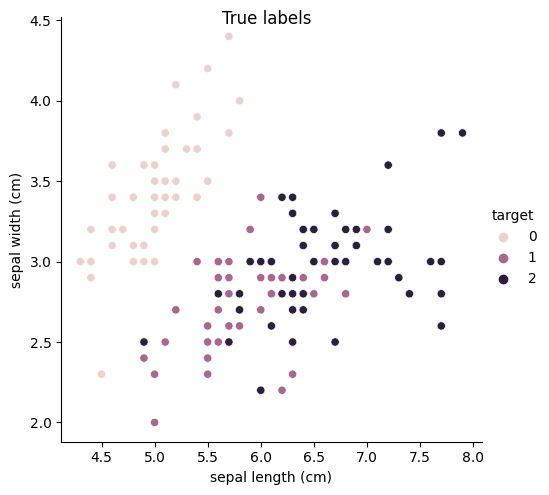

In [12]:
# Esercizio 20.1
iris = load_iris(as_frame=True)
data = iris.data
targets = iris.target
X = data.loc[:, ('sepal length (cm)', 'sepal width (cm)')].values
N_CLUSTERS = 3
kmeans = KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(X)
labels = sns.relplot(
    data=data,
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue=targets)
labels.fig.suptitle('Label veri')

Text(0.5, 0.98, 'Predicted clusters')

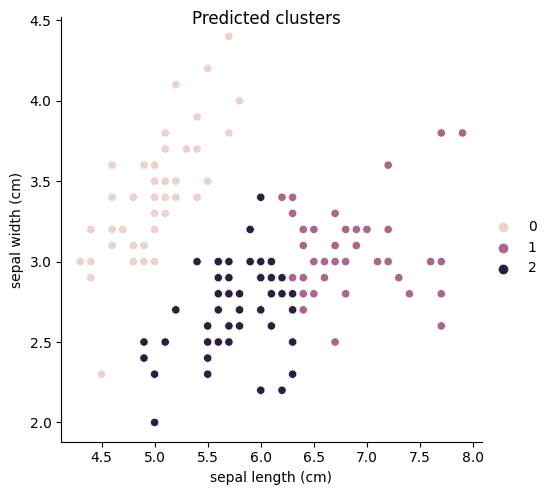

In [13]:
y_pred = kmeans.predict(X)
predictions = sns.relplot(
    data=data,
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue=y_pred)
predictions.fig.suptitle('Label predetti dal clustering')

Text(0.5, 1.0, 'Cardinalities')

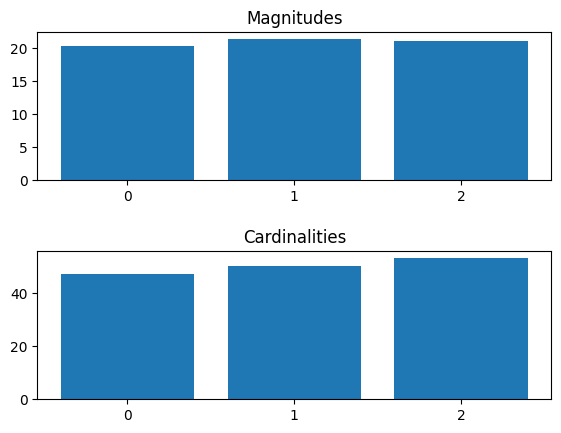

In [3]:
# Esercizio 20.2
# Ottengo le distanze
X_dist = kmeans.transform(X)

# Funzione per calcolare magnitudine e cardinalità
def get_magnitudes_cardinalities(dists):
    clusters = np.argmin(dists, axis=1)
    distances = np.amin(dists, axis=1)
    dists_cens = list(zip(clusters, distances))
    magnitudes = np.zeros(len(set(clusters)))
    cardinalities = np.zeros(len(set(clusters)))
    for dc in dists_cens:
        magnitudes[dc[0]] += dc[1]
        cardinalities[dc[0]] += 1
    return magnitudes, cardinalities

# Plotto magnitudine e cardinalità
m, c = get_magnitudes_cardinalities(X_dist)
cls_tags = list(range(N_CLUSTERS))
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.tight_layout(pad=3.0)
ax1.bar(cls_tags, m)
ax1.set_xticks([0, 1, 2])
ax1.set_title('Magnitudes')
ax2.bar(cls_tags, c)
ax2.set_xticks([0, 1, 2])
ax2.set_title('Cardinalities')

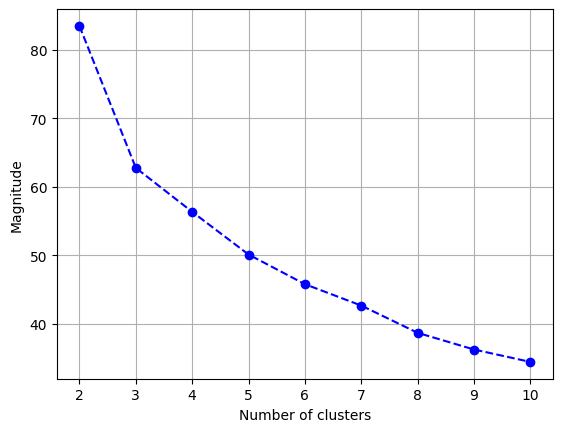

In [4]:
# Esercizio E20.3
def fit_get_magnitude(values, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(values)
    m, _ = get_magnitudes_cardinalities(kmeans.transform(values))
    return m.sum()

def get_k_magnitudes(values, min_clusters, max_clusters):
    clusters_values = list(range(min_clusters, max_clusters+1))
    magnitudes = [
        fit_get_magnitude(values, n_clusters) \
        for n_clusters in clusters_values]
    return magnitudes, clusters_values

ms, cvals = get_k_magnitudes(X, 2, 10)

plt.plot(cvals, ms, '--bo')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Magnitude')
plt.show()


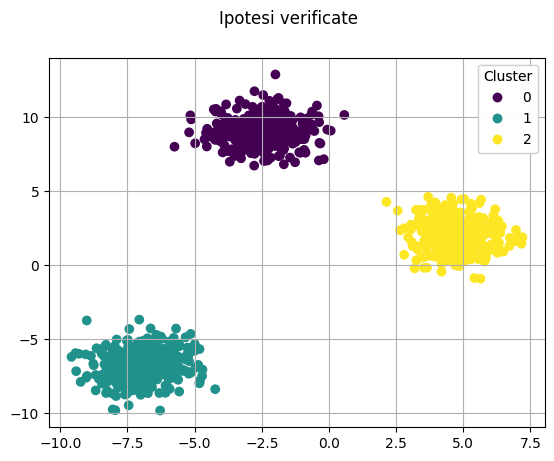

In [5]:
def fit_plot(
    cls,
    X,
    title: str) -> None:
    """ Wrapper per il fit ed il plot delle predizioni.

    Args:
        cls: algoritmo di clustering
        X: dati su cui effettuare il clustering
        title: titolo del plot
    """
    preds = cls.fit_predict(X)
    fig, ax = plt.subplots()
    scatter = ax.scatter(X[:, 0], X[:, 1], c=preds)
    legend = ax.legend(
        *scatter.legend_elements(),
        title='Cluster')
    ax.add_artist(legend)
    fig.suptitle(title)
    ax.grid()
    plt.show()

# Esercizio E20.4
X, y = make_blobs(n_samples=1000, random_state=42)
kmeans = KMeans(n_clusters=3)
fit_plot(kmeans, X, 'Ipotesi verificate')

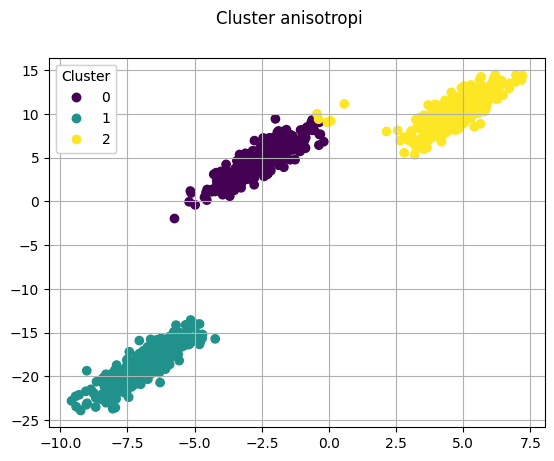

In [6]:
# Ipotesi 1: anisotropia
t = np.tan(np.radians(60))
rot = np.array([[1, t], [0, 1]])
X_an = X.dot(rot)
kmeans_an = KMeans(n_clusters=3)
fit_plot(kmeans_an, X_an, 'Cluster anisotropi')

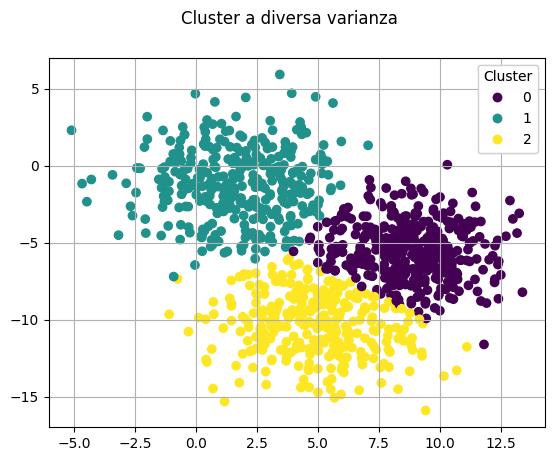

In [7]:
# Ipotesi 2: diversa varianza
X_var, y_var = make_blobs(
    n_samples=1000,
    random_state=200,
    cluster_std=[1.8, 2.5, 2.4])

kmeans_var = KMeans(n_clusters=3)
fit_plot(kmeans_var, X_var, 'Cluster a diversa varianza')

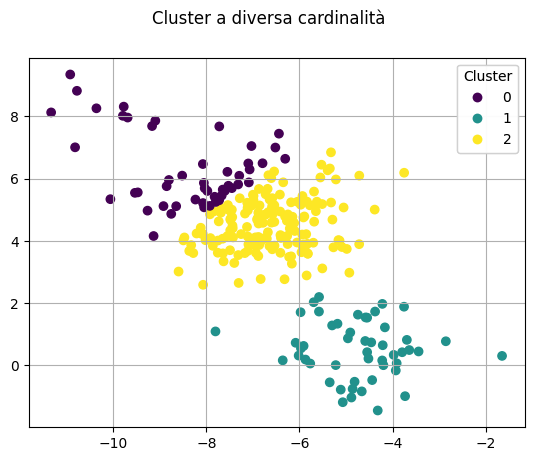

In [8]:
# Ipotesi 3: diversa cardinalità
X, y = make_blobs(n_samples=1000, random_state=12)
X_uneven = np.concatenate(
    (X[y == 0][:200], X[y == 1][:50], X[y == 2][:10]),
    axis=0)
kmeans_uneven = KMeans(n_clusters=3)
fit_plot(kmeans_uneven, X_uneven, 'Cluster a diversa cardinalità')

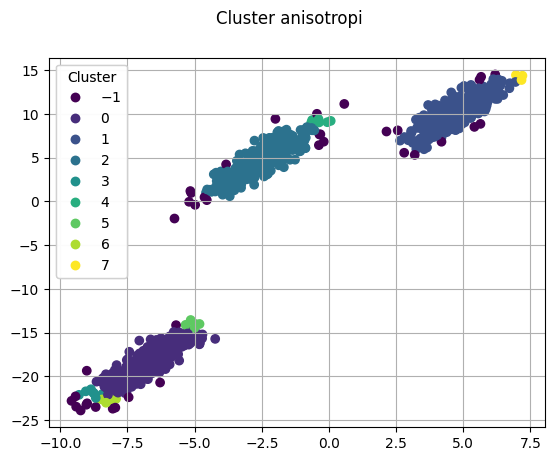

In [9]:
# Esercizio 20.5
# Ipotesi 1: anisotropia
dbscan_an = DBSCAN()
fit_plot(dbscan_an, X_an, 'Cluster anisotropi')

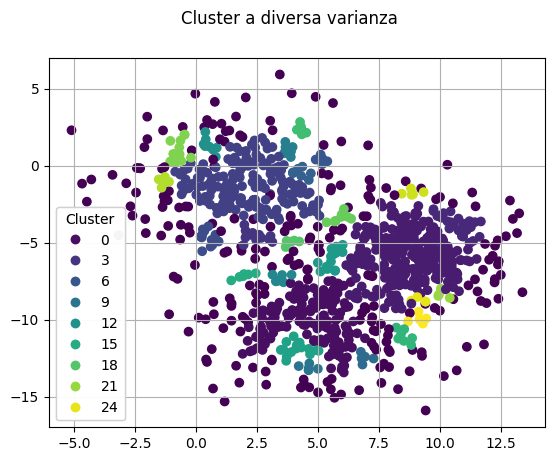

In [10]:
# Ipotesi 2: diversa varianza
dbscan_var = DBSCAN()
fit_plot(dbscan_var, X_var, 'Cluster a diversa varianza')

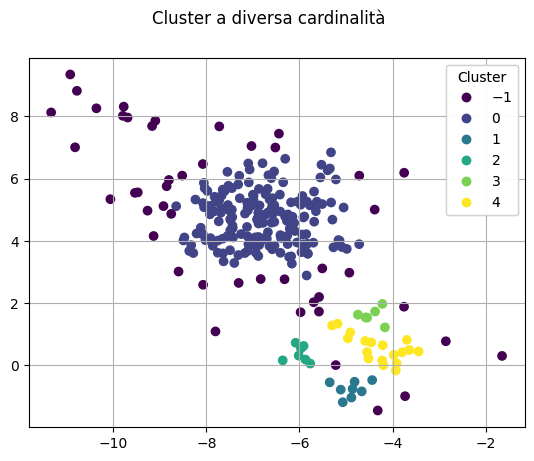

In [11]:
# Ipotesi 3: diversa cardinalità
dbscan_uneven = DBSCAN()
fit_plot(dbscan_uneven, X_uneven, 'Cluster a diversa cardinalità')